<a href="https://colab.research.google.com/github/khalidme94/Python_Codingdojo/blob/main/Weekend_Project_Room5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

Import and read the Titanic dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/daniel-dc-cd/data_science/master/module_3_Python/data/titanic.csv')
 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Expolring the data and find some sample

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
546,547,1,2,"Beane, Mrs. Edward (Ethel Clarke)",female,19.0,1,0,2908,26.0000,NaN,S
506,507,1,2,"Quick, Mrs. Frederick Charles (Jane Richards)",female,33.0,0,2,26360,26.0000,NaN,S
625,626,0,1,"Sutton, Mr. Frederick",male,61.0,0,0,36963,32.3208,D50,S
454,455,0,3,"Peduzzi, Mr. Joseph",male,NaN,0,0,A/5 2817,8.0500,NaN,S
685,686,0,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.0,1,2,SC/Paris 2123,41.5792,NaN,C
321,322,0,3,"Danoff, Mr. Yoto",male,27.0,0,0,349219,7.8958,NaN,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
72,73,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.5000,NaN,S
436,437,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,34.3750,NaN,S
818,819,0,3,"Holm, Mr. John Fredrik Alexander",male,43.0,0,0,C 7075,6.4500,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Understand names

In [ ]:
df.loc[df.Name=='Guggenheim, Mr. Benjamin']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
789,790,0,1,"Guggenheim, Mr. Benjamin",male,46.0,0,0,PC 17593,79.2,B82 B84,C


In [ ]:
df.iloc[359,3]

'Mockler, Miss. Helen Mary "Ellie"'

In [ ]:
df.iloc[244,3]


'Attalah, Mr. Sleiman'

Showing breif describtion of the dataset

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We found that there are some invalid data in some columns, so we should split the column 'Name' two times to delete unrelated names that exist between pranthesis or square bracket.

In [ ]:
df['Name']=df.Name.str.split('(',expand=True)[0]

In [ ]:
df['Name']

0                       Braund, Mr. Owen Harris
1                   Cumings, Mrs. John Bradley 
2                        Heikkinen, Miss. Laina
3                 Futrelle, Mrs. Jacques Heath 
4                      Allen, Mr. William Henry
                         ...                   
886                       Montvila, Rev. Juozas
887                Graham, Miss. Margaret Edith
888    Johnston, Miss. Catherine Helen "Carrie"
889                       Behr, Mr. Karl Howell
890                         Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
df['Name']=df.Name.str.split('"',expand=True)[0]

In [ ]:
df['Name']

0               Braund, Mr. Owen Harris
1           Cumings, Mrs. John Bradley 
2                Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath 
4              Allen, Mr. William Henry
                     ...               
886               Montvila, Rev. Juozas
887        Graham, Miss. Margaret Edith
888    Johnston, Miss. Catherine Helen 
889               Behr, Mr. Karl Howell
890                 Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

We should split the 'Cabin' column for those who have more than one cabin

In [ ]:
df['Cabin']=df.Cabin.str.split(' ',)

In [ ]:
df['Cabin']

0         NaN
1       [C85]
2         NaN
3      [C123]
4         NaN
        ...  
886       NaN
887     [B42]
888       NaN
889    [C148]
890       NaN
Name: Cabin, Length: 891, dtype: object

Chicking for nulls of all colums.

In [ ]:
df.PassengerId.isnull().sum()

0

In [ ]:
df.Survived.isnull().sum()

0

In [ ]:
df.Pclass.isnull().sum()

0

In [ ]:
df.Name.isnull().sum()

0

In [ ]:
df.Sex.isnull().sum()

0

In [ ]:
df.Age.isnull().sum()

177

In [ ]:
df.SibSp.isnull().sum()

0

In [ ]:
df.Parch.isnull().sum()

0

In [ ]:
df.Ticket.isnull().sum()

0

In [ ]:
df.Fare.isnull().sum()

0

In [ ]:
df.Cabin.isnull().sum()

687

Visualization


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


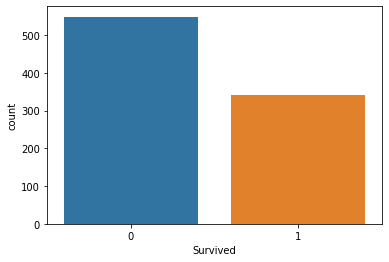

In [ ]:
sns.countplot("Survived", data = df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


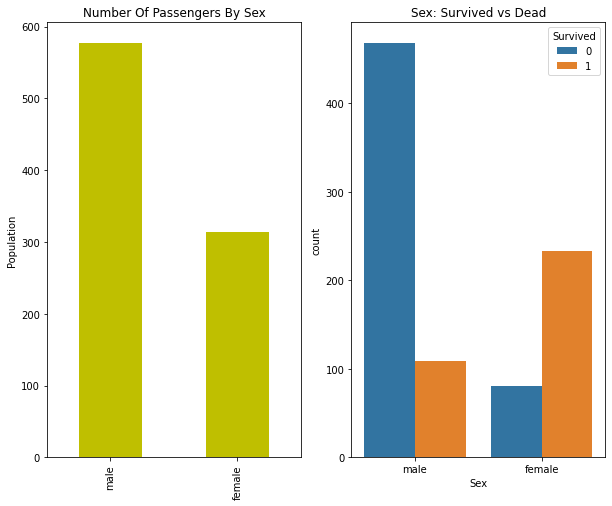

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (10, 8))
df["Sex"].value_counts().plot.bar(color = "y", ax = ax[0])
ax[0].set_title("Number Of Passengers By Sex")
ax[0].set_ylabel("Population")
sns.countplot("Sex", hue = "Survived", data = df, ax = ax[1])
ax[1].set_title("Sex: Survived vs Dead")
plt.show()

We want to Visualize the number of childeren and adults who survived or died.  

Assumptions:lets assume that age of Children is the range of (0-13) years
and ages above that called Adult.

In [ ]:
df.loc[df['Age'] <=13, 'Category'] = 'Child'
df.loc[df['Age'] >13, 'Category'] = 'Adult'
df.loc[df['Age'].isna()==True, 'Category'] = 'Null'

In [ ]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Category
80,81,0,3,"Waelens, Mr. Achille",male,22.0,0,0,345767,9.0000,NaN,S,Adult
713,714,0,3,"Larsson, Mr. August Viktor",male,29.0,0,0,7545,9.4833,NaN,S,Adult
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,[G6],S,Child
163,164,0,3,"Calic, Mr. Jovo",male,17.0,0,0,315093,8.6625,NaN,S,Adult
392,393,0,3,"Gustafsson, Mr. Johan Birger",male,28.0,2,0,3101277,7.9250,NaN,S,Adult
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.5000,[A26],C,Adult
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,Null
557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C,Null
356,357,1,1,"Bowerman, Miss. Elsie Edith",female,22.0,0,1,113505,55.0000,[E33],S,Adult
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S,Null


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


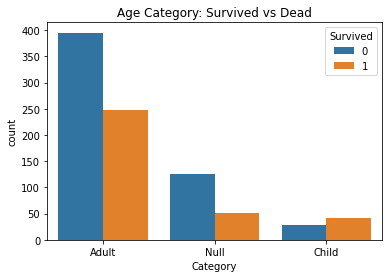

In [ ]:

sns.countplot("Category", hue = "Survived", data = df)
plt.title("Age Category: Survived vs Dead")
plt.show()